# Can i justify using only one projection

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix
from getSIDMdata_generator_meta import get_tf_DataSet as getGenerators_meta
from glob import glob
from tools import get_best_model,get_predictions_per_subset
import os
from scipy.stats import norm
import scienceplots
from tqdm import tqdm
import mertens_models as mertens
plt.style.use(["science", "grid"])

### First see if there is a preference in the testing set for merging or relaxed

In [3]:
model_name = "inception"

#### First get the global test set

In [52]:
simulationNames = ['CDM','SIDM0.1','SIDM1']
num_classes = len(simulationNames)
channels = ['total','stellar','xray']
data_file = 'pickles/binned_data_20.pkl'
epochs=80
savefile = 'pickles/test_sample_size_newarr.pkl'

In [54]:
np.linspace(0.1,0.99,20)

array([0.1       , 0.14684211, 0.19368421, 0.24052632, 0.28736842,
       0.33421053, 0.38105263, 0.42789474, 0.47473684, 0.52157895,
       0.56842105, 0.61526316, 0.66210526, 0.70894737, 0.75578947,
       0.80263158, 0.84947368, 0.89631579, 0.94315789, 0.99      ])

In [ ]:
nsplit = 20
all_splits = np.linspace(0.1,0.99,nsplit)
accuracy_arr = np.zeros(nsplit)
j=0

_, global_test, params = getGenerators_meta(augment_data=True, simulationNames=['CDM'], 
                                                      channels=channels, 
                                                      allDataFile='pickles/binned_data_20_newseed.pkl',
                                                      return_test_params=True,
                                                      train_split=0.01)
    
for i, iSplit in enumerate(all_splits):
 
    train, test, params = getGenerators_meta(augment_data=True, simulationNames=simulationNames, 
                                                      channels=channels, 
                                                      allDataFile=data_file,
                                                      return_test_params=True,
                                                      train_split=iSplit)
    
    checkpoint_filepath = "models/train_size/%f0.3" % iSplit
    
    cnnmodel = get_best_model( train, test,  model_name='Inception', 
                   checkpoint_filepath=checkpoint_filepath, epochs=epochs)
    
    accuracy_arr[i] = cnnmodel.evaluate(global_test[0],global_test[1])[1]
    
pkl.dump(accuracy_arr, open(savefile,'wb'))

In [40]:
from scipy.optimize import curve_fit
def func(x, p1, p2):
    return p1 + p2*1./(1+x)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `../plots/training_size.pdf'.
missing info would be 1.005


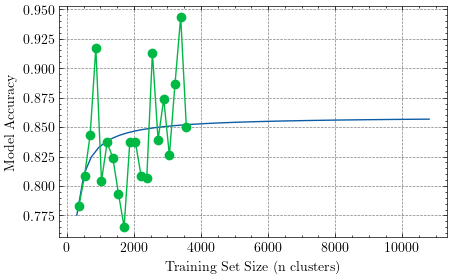

In [59]:
nsplit=20
all_splits = np.linspace(0.1,0.99,nsplit)
savefile = 'pickles/test_sample_size_arr.pkl'
savefile = 'pickles/test_sample_size_newarr.pkl'

fig = plt.figure(figsize=(5,3))
accuracy = pkl.load(open(savefile,'rb'))

popt, pcov = curve_fit(func, all_splits*3600, accuracy)
xplot = np.linspace(300,3*3600)
plt.plot(xplot, func( xplot, *popt))
plt.plot(all_splits*3600, accuracy,'o',ls='-')
plt.xlabel('Training Set Size (n clusters)')
plt.ylabel('Model Accuracy')
filename = '../plots/training_size.pdf'
plt.savefig(filename)
os.system('pdfcrop %s %s' % (filename,filename))
print('missing info would be %0.3f' % (func(3*3600.,*popt)/func(3600.,*popt)))